<a href="https://colab.research.google.com/github/kiera-dev/ACNH_Colab_SQL/blob/main/ACNH_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install duckdb

In [2]:
import duckdb, os
import pandas as pd

acnh_villagers_csv_path = "/content/drive/MyDrive/acnh_data/villagers.csv"
acnh_housewares_csv_path = "/content/drive/MyDrive/acnh_data/housewares.csv"

if os.path.exists(acnh_villagers_csv_path):
  print(f"Loading Villagers: {acnh_villagers_csv_path}")
  villagers_df = pd.read_csv(acnh_villagers_csv_path)
  # villagers_df = villagers_df.rename(columns={"Favorite Song": "favorite_song"})
  villagers_df = villagers_df.rename(columns=lambda x: x.lower().replace(' ', '_'))
  print(f"Loading Furniture: {acnh_housewares_csv_path}")
  housewares_df = pd.read_csv(acnh_housewares_csv_path)
  housewares_df = housewares_df.rename(columns=lambda x: x.lower().replace(' ', '_'))
else:
  print(f"Derp")

villagers_df
housewares_df

Loading Villagers: /content/drive/MyDrive/acnh_data/villagers.csv
Loading Furniture: /content/drive/MyDrive/acnh_data/housewares.csv


,name,variation,body_title,pattern,pattern_title,diy,body_customize,pattern_customize,kit_cost,buy,...,interact,tag,outdoor,speaker_type,lighting_type,catalog,filename,variant_id,internal_id,unique_entry_id
0,acoustic guitar,Natural,Body,NaN,NaN,Yes,Yes,No,5.0,NFS,...,Yes,Musical Instrument,No,Does not play music,No lighting,Not for sale,FtrAcorsticguitar_Remake_0_0,0_0,383,EpywQXABBcv2dipsP
1,acoustic guitar,Cherry,Body,NaN,NaN,Yes,Yes,No,5.0,NFS,...,Yes,Musical Instrument,No,Does not play music,No lighting,Not for sale,FtrAcorsticguitar_Remake_1_0,1_0,383,K9she5Y4SuXA8MGBR
2,acoustic guitar,Brown,Body,NaN,NaN,Yes,Yes,No,5.0,NFS,...,Yes,Musical Instrument,No,Does not play music,No lighting,Not for sale,FtrAcorsticguitar_Remake_2_0,2_0,383,vLq9iphAvALBXazDr
3,acoustic guitar,Blue,Body,NaN,NaN,Yes,Yes,No,5.0,NFS,...,Yes,Musical Instrument,No,Does not play music,No lighting,Not for sale,FtrAcorsticguitar_Remake_3_0,3_0,383,nuqeFzNE5PneqGHaj
4,acoustic guitar,White,Body,NaN,NaN,Yes,Yes,No,5.0,NFS,...,Yes,Musical Instrument,No,Does not play music,No lighting,Not for sale,FtrAcorsticguitar_Remake_4_0,4_0,383,DotFsojrhCwrLZ3TF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3270,zen-style stone,White granite,Stone,NaN,NaN,Yes,Yes,No,6.0,NFS,...,No,Japanese Style,Yes,Does not play music,No lighting,Not for sale,FtrGravestoneJapan_Remake_0_0,0_0,7317,xDuaerhiJuiJnwNDS
3271,zen-style stone,Andesite,Stone,NaN,NaN,Yes,Yes,No,6.0,NFS,...,No,Japanese Style,Yes,Does not play music,No lighting,Not for sale,FtrGravestoneJapan_Remake_1_0,1_0,7317,YfpPverX5Q2iEwRF2
3272,zen-style stone,Black granite,Stone,NaN,NaN,Yes,Yes,No,6.0,NFS,...,No,Japanese Style,Yes,Does not play music,No lighting,Not for sale,FtrGravestoneJapan_Remake_2_0,2_0,7317,nrzjikKKpni7sAMir
3273,zen-style stone,Brown granite,Stone,NaN,NaN,Yes,Yes,No,6.0,NFS,...,No,Japanese Style,Yes,Does not play music,No lighting,Not for sale,FtrGravestoneJapan_Remake_3_0,3_0,7317,7qXRema8baxyunhvS


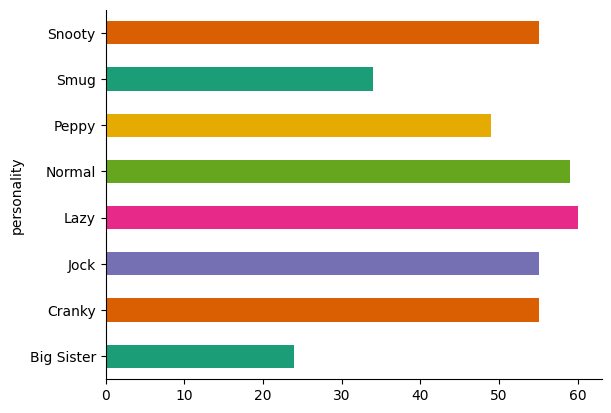

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
villagers_df.groupby('personality').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
duckdb.sql("SELECT name,gender,species,personality,catchphrase FROM villagers_df WHERE species = 'Cat'")

┌──────────┬─────────┬─────────┬─────────────┬─────────────┐
│   name   │ gender  │ species │ personality │ catchphrase │
│ varchar  │ varchar │ varchar │   varchar   │   varchar   │
├──────────┼─────────┼─────────┼─────────────┼─────────────┤
│ Ankha    │ Female  │ Cat     │ Snooty      │ me meow     │
│ Bob      │ Male    │ Cat     │ Lazy        │ pthhpth     │
│ Felicity │ Female  │ Cat     │ Peppy       │ mimimi      │
│ Kabuki   │ Male    │ Cat     │ Cranky      │ meooo-OH    │
│ Katt     │ Female  │ Cat     │ Big Sister  │ purrty      │
│ Kid Cat  │ Male    │ Cat     │ Jock        │ psst        │
│ Kiki     │ Female  │ Cat     │ Normal      │ kitty cat   │
│ Kitty    │ Female  │ Cat     │ Snooty      │ mrowrr      │
│ Lolly    │ Female  │ Cat     │ Normal      │ bonbon      │
│ Merry    │ Female  │ Cat     │ Peppy       │ mweee       │
│ Mitzi    │ Female  │ Cat     │ Normal      │ mew         │
│ Moe      │ Male    │ Cat     │ Lazy        │ myawn       │
│ Monique  │ Female  │ C

In [5]:
duckdb.sql("SELECT name,gender,species,personality,catchphrase FROM villagers_df WHERE species = 'Cat' AND personality = 'Peppy'")

┌──────────┬─────────┬─────────┬─────────────┬─────────────┐
│   name   │ gender  │ species │ personality │ catchphrase │
│ varchar  │ varchar │ varchar │   varchar   │   varchar   │
├──────────┼─────────┼─────────┼─────────────┼─────────────┤
│ Felicity │ Female  │ Cat     │ Peppy       │ mimimi      │
│ Merry    │ Female  │ Cat     │ Peppy       │ mweee       │
│ Rosie    │ Female  │ Cat     │ Peppy       │ silly       │
│ Tabby    │ Female  │ Cat     │ Peppy       │ me-WOW      │
│ Tangy    │ Female  │ Cat     │ Peppy       │ reeeeOWR    │
└──────────┴─────────┴─────────┴─────────────┴─────────────┘

In [6]:
duckdb.sql("SELECT name,gender,species,personality,catchphrase FROM villagers_df WHERE species = 'Cat' AND name LIKE 'A%'")

┌─────────┬─────────┬─────────┬─────────────┬─────────────┐
│  name   │ gender  │ species │ personality │ catchphrase │
│ varchar │ varchar │ varchar │   varchar   │   varchar   │
├─────────┼─────────┼─────────┼─────────────┼─────────────┤
│ Ankha   │ Female  │ Cat     │ Snooty      │ me meow     │
└─────────┴─────────┴─────────┴─────────────┴─────────────┘

In [7]:
duckdb.sql("SELECT personality, COUNT(*) AS personality_count FROM villagers_df GROUP BY personality")

┌─────────────┬───────────────────┐
│ personality │ personality_count │
│   varchar   │       int64       │
├─────────────┼───────────────────┤
│ Cranky      │                55 │
│ Peppy       │                49 │
│ Big Sister  │                24 │
│ Lazy        │                60 │
│ Normal      │                59 │
│ Snooty      │                55 │
│ Smug        │                34 │
│ Jock        │                55 │
└─────────────┴───────────────────┘

In [8]:
duckdb.sql("SELECT personality, COUNT(*) AS personality_count, COUNT(*) * 100.0 / (SELECT COUNT(personality) FROM villagers_df ) AS personality_percentage FROM villagers_df GROUP BY personality ORDER BY personality_count ASC")

┌─────────────┬───────────────────┬────────────────────────┐
│ personality │ personality_count │ personality_percentage │
│   varchar   │       int64       │         double         │
├─────────────┼───────────────────┼────────────────────────┤
│ Big Sister  │                24 │      6.138107416879795 │
│ Smug        │                34 │      8.695652173913043 │
│ Peppy       │                49 │     12.531969309462916 │
│ Cranky      │                55 │     14.066496163682864 │
│ Snooty      │                55 │     14.066496163682864 │
│ Jock        │                55 │     14.066496163682864 │
│ Normal      │                59 │     15.089514066496164 │
│ Lazy        │                60 │     15.345268542199488 │
└─────────────┴───────────────────┴────────────────────────┘

In [9]:
duckdb.sql("SELECT COUNT(*) * 100.0 / (SELECT COUNT(*) FROM villagers_df ) AS cranky_percentage FROM villagers_df WHERE personality = 'Cranky'")

┌────────────────────┐
│ cranky_percentage  │
│       double       │
├────────────────────┤
│ 14.066496163682864 │
└────────────────────┘

In [10]:
duckdb.sql("SELECT COUNT(*) * 100.0 / (SELECT COUNT(*) FROM villagers_df WHERE species = 'Cat') AS cat_cranky_percentage FROM villagers_df WHERE species = 'Cat' AND personality = 'Cranky'")

┌───────────────────────┐
│ cat_cranky_percentage │
│        double         │
├───────────────────────┤
│     8.695652173913043 │
└───────────────────────┘

In [11]:
duckdb.sql("SELECT personality, COUNT(*) AS cat_personality_count, COUNT(*) * 100.0 / (SELECT COUNT(personality) FROM villagers_df WHERE species = 'Cat') AS cat_personality_percentage FROM villagers_df WHERE species = 'Cat' GROUP BY personality ORDER BY cat_personality_count ASC")

┌─────────────┬───────────────────────┬────────────────────────────┐
│ personality │ cat_personality_count │ cat_personality_percentage │
│   varchar   │         int64         │           double           │
├─────────────┼───────────────────────┼────────────────────────────┤
│ Big Sister  │                     1 │         4.3478260869565215 │
│ Smug        │                     1 │         4.3478260869565215 │
│ Cranky      │                     2 │          8.695652173913043 │
│ Jock        │                     3 │         13.043478260869565 │
│ Lazy        │                     3 │         13.043478260869565 │
│ Normal      │                     3 │         13.043478260869565 │
│ Snooty      │                     5 │          21.73913043478261 │
│ Peppy       │                     5 │          21.73913043478261 │
└─────────────┴───────────────────────┴────────────────────────────┘

In [12]:
duckdb.sql("SELECT COUNT(*) * 100.0 / (SELECT COUNT(*) FROM villagers_df ) AS alligator_percentage FROM villagers_df WHERE species = 'Alligator'")

┌──────────────────────┐
│ alligator_percentage │
│        double        │
├──────────────────────┤
│   1.7902813299232736 │
└──────────────────────┘

In [13]:
duckdb.sql("SELECT name,gender,species,personality,catchphrase FROM villagers_df WHERE species = 'Alligator'")

┌─────────┬─────────┬───────────┬─────────────┬─────────────┐
│  name   │ gender  │  species  │ personality │ catchphrase │
│ varchar │ varchar │  varchar  │   varchar   │   varchar   │
├─────────┼─────────┼───────────┼─────────────┼─────────────┤
│ Alfonso │ Male    │ Alligator │ Lazy        │ it'sa me    │
│ Alli    │ Female  │ Alligator │ Snooty      │ graaagh     │
│ Boots   │ Male    │ Alligator │ Jock        │ munchie     │
│ Del     │ Male    │ Alligator │ Cranky      │ gronk       │
│ Drago   │ Male    │ Alligator │ Lazy        │ burrrn      │
│ Gayle   │ Female  │ Alligator │ Normal      │ snacky      │
│ Sly     │ Male    │ Alligator │ Jock        │ hoo-rah     │
└─────────┴─────────┴───────────┴─────────────┴─────────────┘

In [14]:
duckdb.sql("SELECT name,species,personality,catchphrase FROM villagers_df ORDER BY species DESC")

┌──────────┬───────────┬─────────────┬─────────────┐
│   name   │  species  │ personality │ catchphrase │
│ varchar  │  varchar  │   varchar   │   varchar   │
├──────────┼───────────┼─────────────┼─────────────┤
│ Fang     │ Wolf      │ Cranky      │ cha-chomp   │
│ Chief    │ Wolf      │ Cranky      │ harrumph    │
│ Wolfgang │ Wolf      │ Cranky      │ snarrrl     │
│ Lobo     │ Wolf      │ Cranky      │ ah-rooooo   │
│ Whitney  │ Wolf      │ Snooty      │ snappy      │
│ Vivian   │ Wolf      │ Snooty      │ piffle      │
│ Kyle     │ Wolf      │ Smug        │ alpha       │
│ Dobie    │ Wolf      │ Cranky      │ ohmmm       │
│ Audie    │ Wolf      │ Peppy       │ foxtrot     │
│ Freya    │ Wolf      │ Snooty      │ uff da      │
│   ·      │  ·        │   ·         │   ·         │
│   ·      │  ·        │   ·         │   ·         │
│   ·      │  ·        │   ·         │   ·         │
│ Annalisa │ Anteater  │ Normal      │ gumdrop     │
│ Cyrano   │ Anteater  │ Cranky      │ ah-CHOO

In [15]:
duckdb.sql("SELECT name,species,personality,catchphrase FROM villagers_df WHERE species = 'Wolf'")

┌──────────┬─────────┬─────────────┬─────────────┐
│   name   │ species │ personality │ catchphrase │
│ varchar  │ varchar │   varchar   │   varchar   │
├──────────┼─────────┼─────────────┼─────────────┤
│ Audie    │ Wolf    │ Peppy       │ foxtrot     │
│ Chief    │ Wolf    │ Cranky      │ harrumph    │
│ Dobie    │ Wolf    │ Cranky      │ ohmmm       │
│ Fang     │ Wolf    │ Cranky      │ cha-chomp   │
│ Freya    │ Wolf    │ Snooty      │ uff da      │
│ Kyle     │ Wolf    │ Smug        │ alpha       │
│ Lobo     │ Wolf    │ Cranky      │ ah-rooooo   │
│ Skye     │ Wolf    │ Normal      │ airmail     │
│ Vivian   │ Wolf    │ Snooty      │ piffle      │
│ Whitney  │ Wolf    │ Snooty      │ snappy      │
│ Wolfgang │ Wolf    │ Cranky      │ snarrrl     │
├──────────┴─────────┴─────────────┴─────────────┤
│ 11 rows                              4 columns │
└────────────────────────────────────────────────┘

In [16]:
duckdb.sql("SELECT species, COUNT(*) AS species_count, COUNT(*) * 100.0 / (SELECT COUNT(species) FROM villagers_df ) AS species_percentage FROM villagers_df GROUP BY species ORDER BY species_count ASC")

┌───────────┬───────────────┬────────────────────┐
│  species  │ species_count │ species_percentage │
│  varchar  │     int64     │       double       │
├───────────┼───────────────┼────────────────────┤
│ Octopus   │             3 │ 0.7672634271099744 │
│ Cow       │             4 │ 1.0230179028132993 │
│ Bull      │             6 │ 1.5345268542199488 │
│ Rhino     │             6 │ 1.5345268542199488 │
│ Alligator │             7 │ 1.7902813299232736 │
│ Tiger     │             7 │ 1.7902813299232736 │
│ Anteater  │             7 │ 1.7902813299232736 │
│ Hippo     │             7 │ 1.7902813299232736 │
│ Lion      │             7 │ 1.7902813299232736 │
│ Kangaroo  │             8 │ 2.0460358056265986 │
│   ·       │             · │          ·         │
│   ·       │             · │          ·         │
│   ·       │             · │          ·         │
│ Mouse     │            15 │  3.836317135549872 │
│ Horse     │            15 │  3.836317135549872 │
│ Bear      │            15 │  

In [17]:
duckdb.sql("SELECT name,gender,species,personality,catchphrase,hobby FROM villagers_df WHERE hobby = 'Fitness' AND species = 'Gorilla' OR hobby = 'Fitness' AND species = 'Rabbit' ")

┌─────────┬─────────┬─────────┬─────────────┬─────────────────┬─────────┐
│  name   │ gender  │ species │ personality │   catchphrase   │  hobby  │
│ varchar │ varchar │ varchar │   varchar   │     varchar     │ varchar │
├─────────┼─────────┼─────────┼─────────────┼─────────────────┼─────────┤
│ Al      │ Male    │ Gorilla │ Lazy        │ ayyyeee         │ Fitness │
│ Boone   │ Male    │ Gorilla │ Jock        │ baboom          │ Fitness │
│ Boyd    │ Male    │ Gorilla │ Cranky      │ uh-oh           │ Fitness │
│ Cesar   │ Male    │ Gorilla │ Cranky      │ highness        │ Fitness │
│ Hans    │ Male    │ Gorilla │ Smug        │ groovy          │ Fitness │
│ Louie   │ Male    │ Gorilla │ Jock        │ hoo hoo ha      │ Fitness │
│ Peewee  │ Male    │ Gorilla │ Cranky      │ li'l bitty baby │ Fitness │
│ Rocket  │ Female  │ Gorilla │ Big Sister  │ vroom           │ Fitness │
│ Violet  │ Female  │ Gorilla │ Snooty      │ sweetie         │ Fitness │
│ Genji   │ Male    │ Rabbit  │ Jock  

In [18]:
duckdb.sql("SELECT name,species,'Furniture List' FROM villagers_df ")

┌──────────┬───────────┬──────────────────┐
│   name   │  species  │ 'Furniture List' │
│ varchar  │  varchar  │     varchar      │
├──────────┼───────────┼──────────────────┤
│ Admiral  │ Bird      │ Furniture List   │
│ Agent S  │ Squirrel  │ Furniture List   │
│ Agnes    │ Pig       │ Furniture List   │
│ Al       │ Gorilla   │ Furniture List   │
│ Alfonso  │ Alligator │ Furniture List   │
│ Alice    │ Koala     │ Furniture List   │
│ Alli     │ Alligator │ Furniture List   │
│ Amelia   │ Eagle     │ Furniture List   │
│ Anabelle │ Anteater  │ Furniture List   │
│ Anchovy  │ Bird      │ Furniture List   │
│    ·     │  ·        │       ·          │
│    ·     │  ·        │       ·          │
│    ·     │  ·        │       ·          │
│ Wart Jr. │ Frog      │ Furniture List   │
│ Weber    │ Duck      │ Furniture List   │
│ Wendy    │ Sheep     │ Furniture List   │
│ Whitney  │ Wolf      │ Furniture List   │
│ Willow   │ Sheep     │ Furniture List   │
│ Winnie   │ Horse     │ Furnitu

In [19]:
duckdb.sql("SELECT * FROM villagers_df ")
print(villagers_df.columns)
print(villagers_df.describe())
print(villagers_df.shape)

Index(['name', 'species', 'gender', 'personality', 'hobby', 'birthday',
       'catchphrase', 'favorite_song', 'style_1', 'style_2', 'color_1',
       'color_2', 'wallpaper', 'flooring', 'furniture_list', 'filename',
       'unique_entry_id'],
      dtype='object')
           name species gender personality   hobby birthday catchphrase  \
count       391     391    391         391     391      391         391   
unique      391      35      2           8       6      361         388   
top     Admiral     Cat   Male        Lazy  Nature   27-Jan     sweetie   
freq          1      23    204          60      66        2           2   

       favorite_song style_1 style_2 color_1 color_2            wallpaper  \
count            391     391     391     391     391                  391   
unique            89       6       6      14      14                  154   
top      Forest Life  Simple  Simple   Black     Red  backyard-fence wall   
freq              15     118     110      47      

In [20]:
duckdb.sql("SELECT DISTINCT name,interact, FROM housewares_df WHERE DIY = 'Yes' ")

┌────────────────────────┬──────────┐
│          name          │ interact │
│        varchar         │ varchar  │
├────────────────────────┼──────────┤
│ angled signpost        │ No       │
│ apple chair            │ Yes      │
│ Aquarius urn           │ No       │
│ asteroid               │ Yes      │
│ bamboo bench           │ Yes      │
│ bamboo doll            │ Yes      │
│ bamboo noodle slide    │ Yes      │
│ beekeeper's hive       │ No       │
│ birdbath               │ No       │
│ bonfire                │ Yes      │
│    ·                   │ ·        │
│    ·                   │ ·        │
│    ·                   │ ·        │
│ wooden table           │ No       │
│ wooden waste bin       │ Trash    │
│ wooden waste bin       │ Yes      │
│ wooden-block bed       │ Yes      │
│ wooden-block bench     │ Yes      │
│ wooden-block bookshelf │ No       │
│ wooden-block chest     │ Wardrobe │
│ wooden-block stereo    │ Yes      │
│ wooden-block stool     │ Yes      │
│ yellow-lea

In [21]:
duckdb.sql("SELECT DISTINCT name, FROM housewares_df WHERE DIY = 'Yes' AND interact = 'Yes'")

┌─────────────────────────┐
│          name           │
│         varchar         │
├─────────────────────────┤
│ apple chair             │
│ Aries rocking chair     │
│ asteroid                │
│ bamboo doll             │
│ bamboo floor lamp       │
│ bamboo speaker          │
│ bamboo stool            │
│ blossom-viewing lantern │
│ Bunny Day bed           │
│ campfire                │
│    ·                    │
│    ·                    │
│    ·                    │
│ swinging bench          │
│ tall lantern            │
│ tiki torch              │
│ tire toy                │
│ wooden chair            │
│ wooden double bed       │
│ wooden stool            │
│ wooden-block bed        │
│ wooden-block chair      │
│ wooden-block stereo     │
├─────────────────────────┤
│   110 rows (20 shown)   │
└─────────────────────────┘

In [22]:
duckdb.sql("SELECT name,species,personality,catchphrase, birthday,flooring,favorite_song FROM villagers_df WHERE name = 'Al' OR name = 'Audie' OR name ='Marina' OR name ='Renée' OR name = 'Flora' OR name = 'Lobo' OR name ='Bob' OR name = 'Mint' OR name = 'Snake' ORDER BY personality ASC")

┌─────────┬──────────┬─────────────┬─────────────┬──────────┬───────────────────────────┬───────────────┐
│  name   │ species  │ personality │ catchphrase │ birthday │         flooring          │ favorite_song │
│ varchar │ varchar  │   varchar   │   varchar   │ varchar  │          varchar          │    varchar    │
├─────────┼──────────┼─────────────┼─────────────┼──────────┼───────────────────────────┼───────────────┤
│ Renée   │ Rhino    │ Big Sister  │ yo yo yo    │ 28-May   │ tiger-print flooring      │ Surfin' K.K.  │
│ Lobo    │ Wolf     │ Cranky      │ ah-rooooo   │ 5-Nov    │ rosewood flooring         │ K.K. Rock     │
│ Snake   │ Rabbit   │ Jock        │ bunyip      │ 3-Nov    │ dirt flooring             │ King K.K.     │
│ Al      │ Gorilla  │ Lazy        │ ayyyeee     │ 18-Oct   │ green rubber flooring     │ Go K.K. Rider │
│ Bob     │ Cat      │ Lazy        │ pthhpth     │ 1-Jan    │ colorful puzzle flooring  │ Neapolitan    │
│ Marina  │ Octopus  │ Normal      │ blurp    

In [23]:
duckdb.sql("SELECT * FROM housewares_df ")
print(housewares_df.columns)
print(housewares_df.describe())
print(housewares_df.shape)

Index(['name', 'variation', 'body_title', 'pattern', 'pattern_title', 'diy',
       'body_customize', 'pattern_customize', 'kit_cost', 'buy', 'sell',
       'color_1', 'color_2', 'size', 'miles_price', 'source', 'source_notes',
       'version', 'hha_concept_1', 'hha_concept_2', 'hha_series', 'hha_set',
       'interact', 'tag', 'outdoor', 'speaker_type', 'lighting_type',
       'catalog', 'filename', 'variant_id', 'internal_id', 'unique_entry_id'],
      dtype='object')
          kit_cost           sell  miles_price   internal_id
count  2239.000000    3275.000000   115.000000   3275.000000
mean      3.263064    4011.301985  2514.782609   3605.981679
std       3.493774   13823.831987  1275.975270   2379.456027
min       1.000000      20.000000  1000.000000     80.000000
25%       1.000000     575.000000  2000.000000   1645.000000
50%       2.000000    1250.000000  2000.000000   3500.000000
75%       4.000000    2400.000000  3000.000000   4081.000000
max      50.000000  250000.000000  5

In [25]:
duckdb.sql("SELECT name,hha_series FROM housewares_df WHERE NOT hha_series = 'None'")

┌────────────────────┬─────────────────────────┐
│        name        │       hha_series        │
│      varchar       │         varchar         │
├────────────────────┼─────────────────────────┤
│ antique bed        │ antique                 │
│ antique bed        │ antique                 │
│ antique bed        │ antique                 │
│ antique bureau     │ antique                 │
│ antique bureau     │ antique                 │
│ antique bureau     │ antique                 │
│ antique chair      │ antique                 │
│ antique chair      │ antique                 │
│ antique chair      │ antique                 │
│ antique clock      │ antique                 │
│       ·            │    ·                    │
│       ·            │    ·                    │
│       ·            │    ·                    │
│ wooden-block stool │ wooden block            │
│ wooden-block stool │ wooden block            │
│ wooden-block stool │ wooden block            │
│ wooden-block stool

In [26]:
duckdb.sql("SELECT DISTINCT hha_series FROM housewares_df")

┌─────────────────────────┐
│       hha_series        │
│         varchar         │
├─────────────────────────┤
│ None                    │
│ antique                 │
│ stars                   │
│ bamboo                  │
│ festive                 │
│ cherry blossoms         │
│ Bunny Day               │
│ cardboard               │
│ cute                    │
│ diner                   │
│   ·                     │
│   ·                     │
│   ·                     │
│ wooden block            │
│ fruits                  │
│ flowers                 │
│ zen                     │
│ iron                    │
│ tree's bounty or leaves │
│ log                     │
│ shell                   │
│ wedding                 │
│ wooden                  │
├─────────────────────────┤
│   26 rows (20 shown)    │
└─────────────────────────┘

In [30]:
duckdb.sql("SELECT DISTINCT name, hha_series FROM housewares_df WHERE hha_series ='cute' OR hha_series ='zen'")

┌────────────────────┬────────────┐
│        name        │ hha_series │
│      varchar       │  varchar   │
├────────────────────┼────────────┤
│ cute bed           │ cute       │
│ cute DIY table     │ cute       │
│ cute tea table     │ cute       │
│ imperial low table │ zen        │
│ cute chair         │ cute       │
│ cute floor lamp    │ cute       │
│ cute sofa          │ cute       │
│ cute vanity        │ cute       │
│ cute wardrobe      │ cute       │
│ imperial bed       │ zen        │
│ imperial chest     │ zen        │
│ imperial partition │ zen        │
├────────────────────┴────────────┤
│ 12 rows               2 columns │
└─────────────────────────────────┘

In [33]:
duckdb.sql("SELECT DISTINCT hha_concept_1 FROM housewares_df ORDER BY hha_concept_1 ASC")

┌───────────────┐
│ hha_concept_1 │
│    varchar    │
├───────────────┤
│ None          │
│ bathroom      │
│ child's room  │
│ concert       │
│ den           │
│ expensive     │
│ facility      │
│ fancy         │
│ fitness       │
│ folk art      │
│    ·          │
│    ·          │
│    ·          │
│ living room   │
│ music         │
│ ocean         │
│ office        │
│ outdoors      │
│ party         │
│ school        │
│ shop          │
│ space         │
│ zen-style     │
├───────────────┤
│    24 rows    │
│  (20 shown)   │
└───────────────┘

In [35]:
duckdb.sql("SELECT DISTINCT name, hha_concept_1 FROM housewares_df WHERE hha_concept_1 = 'zen-style'")

┌───────────────────────────┬───────────────┐
│           name            │ hha_concept_1 │
│          varchar          │    varchar    │
├───────────────────────────┼───────────────┤
│ bamboo basket             │ zen-style     │
│ bamboo floor lamp         │ zen-style     │
│ bamboo partition          │ zen-style     │
│ bamboo shelf              │ zen-style     │
│ bamboo speaker            │ zen-style     │
│ bamboo stool              │ zen-style     │
│ bamboo stopblock          │ zen-style     │
│ blossom-viewing lantern   │ zen-style     │
│ cherry-blossom pond stone │ zen-style     │
│ deer scare                │ zen-style     │
│     ·                     │     ·         │
│     ·                     │     ·         │
│     ·                     │     ·         │
│ maple-leaf pond stone     │ zen-style     │
│ mossy garden rock         │ zen-style     │
│ outdoor picnic set        │ zen-style     │
│ paper lantern             │ zen-style     │
│ pile of zen cushions      │ zen-